# Graph Relationships Among Faculty

In this notebook, we are going to create a graph that shows relationships between faculty based on co-authorship in PubMed-index papers. 



### Run the cell below if you need to install biopython

In [1]:
#!conda install biopython -y

In [3]:
from Bio import Entrez
import networkx as nx
import os
DATADIR = os.path.join(os.getcwd(), "..", "ClassPrep")
print(os.path.exists(DATADIR))
from IPython.display import Image, display
import nxdrawing as nxd
import gzip
import pickle

False


### Faculty names copied from Spreadsheet

We need to do some manipulation to get the names in a form I want

In [4]:
faculty = [tuple(s.split("\t")) for s in 
"""AbdelRahman	Samir E
Adler	Frederick R
Bray	Bruce E
Camp	Nicola J
Chapman	Brian E
Chapman	Wendy W
Conway	Michael A
Cummins	Mollie R
Del Fiol	Guilherme
Drews	Frank A
Egger	Marlene J
Eilbeck	Karen
Evans	R Scott
Facelli	Julio C
Gibson	Bryan S
Gouripeddi	Ramkiran
Haug	Peter J
Huff	Stanley M
Hurdle	John F
Kawamoto	Kensaku
Lee	Younghee
Narus	Scott P
Nebeker	Jonathan
Parker	Dennis L
Piccolo	Stephen
Quinlan	Aaron
Samore	Matthew H
Sauer	Brian C
Staes	Catherine J
Sward	Katherine A
Weir	Charlene R
Yandell	Mark
Dean	J Michael
Gesteland	Per H
Gundlapalli	Adi V
Jackson	Brian R
Lincoln	Michael J
Morris	Alan H
Xu	Wu""".split("\n")]
faculty = ["%s %s"%(f[1],f[0]) for f in faculty]


In [ ]:
#faculty = ["Brian E Chapman", "David Gur", "Wendy W Chapman", "Peter J Haug", "Dennis L Parker", "Matthew H Samore"]

### Created an undirected graph

In [5]:
authorship = nx.MultiGraph()

In [6]:
with gzip.open(os.path.join(".", "researchers_pubmed.pickle.gzip"), "rb") as f0:
    coauthors_with_ext = pickle.load(f0)

### Add co-authors who are faculty
#### Keep track of people we didn't add



In [7]:
not_added = []
for author, papers in coauthors_with_ext.items():

    for title, authors in papers.items():
        for a in authors:
            if a != author:
                if a in faculty:
                    authorship.add_edge(author, a, key=title,attr_dict={"paper":title})
                else:
                    not_added.append(a)
                

### Use pydot to draw pretty graph

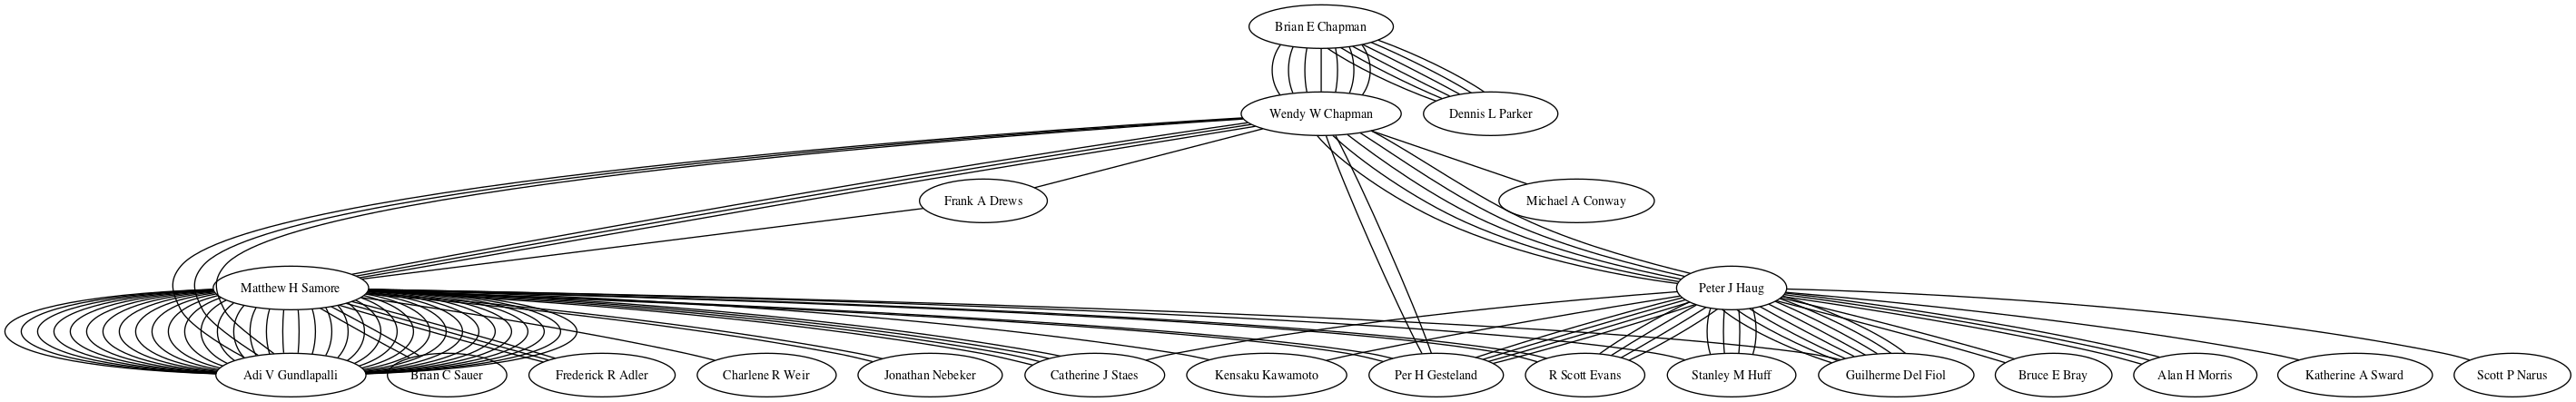

In [8]:
display(nxd.draw_dot(authorship, "bmi.png"))


#### Look at who we didn't add

In [9]:
na = list(set(not_added))
na.sort()
for n in na:
    print(n)

A Clayton Curtis
Aaron Hofmann
Aaron M Cohen
Aaron M Mohs
Adam B Wilcox
Adam H De Havenon
Adam Starkey
Adi Beth-Din
Adi Gundlapalli
Adva Mechaly
Akihiko Sakata
Alberto Bert
Alberto M Biancardi
Aldo Tinoco
Alec B Chapman
Alessi Vande Casteele
Alexander I Veress
Alexander J Kallen
Alexander Stojadinovic
Alexei A Samsonov
Alexis Farrer
Alexis I Farrer
Alfred K Cheung
Ali F Wood
Ali Farooqi
Alicia Y Toledano
Allison A Kelly
Allison H Payne
Allison Payne
Alon Y Ben-Ari
Alun Thomas
Alyssa M Krasinskas
Amanda R Smith
Amra Uzicanin
Amy Blevins
Amy E Blevins
Amy E Furman
Amy E Kelly
Amy H Klym
Amy H Lu
Amy Klym
Amy Lu
Amy Schneider
Amy Vogel
Amyanne Wuthrich
Anat Zvi
Andreas Greiser
Andrew J Gawron
Andrew J Nowalk
Andrew M Hersh
Andrew M Redd
Andrew Perez
Andrew Redd
Andrew W Moore
Andriy I Bandos
Angela Huttner
Anita Y Kinney
Anji T Yetman
Ann F Chou
Anna E Lokshin
Anne M Kennedy
Anthony D Harris
Anthony E Fiore
Anthony F Wong
Anthony P Morreale
Anthony P Reeves
Anthony Wong
Anupam Goel
Anusha

### Connected Subgraphs

Graphs can consist of distinct components that are disconnected from each other [connected_component_subgraphs](https://networkx.github.io/documentation/latest/reference/generated/networkx.algorithms.components.connected.connected_component_subgraphs.html?highlight=connected_component_subgraphs) creates distinct graphs for each connected component and returns them in a list.

We also use the [``sort``](https://docs.python.org/3/library/stdtypes.html#list.sort) method of the list to sort the subgraphs by the number of nodes in each graph.

>*key* specifies a function of one argument that is used to extract a comparison key from each list element (for example, key=str.lower). The key corresponding to each item in the list is calculated once and then used for the entire sorting process. The default value of None means that list items are sorted directly without calculating a separate key value.

* We use list comprehension to keep the subgraphs that have more than two nodes.
* We use an [anonymous lambda function](https://docs.python.org/3/howto/functional.html#small-functions-and-the-lambda-expression) to do the sorting.

In [10]:
subgraphs = [g for g in nx.connected_component_subgraphs(authorship) if g.number_of_nodes() > 2]
subgraphs.sort(key=lambda g: g.number_of_nodes())
print("The number of subgraphs is %d"%len(subgraphs))
print([g.number_of_nodes() for g in subgraphs])

The number of subgraphs is 1
[22]


## Challenge: Who is the most "important" collaborator?

## Challenge: What is the average degree of a researcher?

## Challenge: If you convert from a MultiGraph to a Graph who is the most imporant researcher?